In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
#data for simulation without bh
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo,vr_wo,vtheta_wo,vphi_wo=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_sophia_neu.dat', usecols=(1,9,10,29,30,31,32,33,34,35,36,37), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [4]:
r3d,J_phi,J_theta,J_r=np.loadtxt('actions_bh.txt')
r3d_wo,J_phi_wo,J_theta_wo,J_r_wo=np.loadtxt('actions_wo_bh.txt')
hmr_bh,hlr_bh,hmr_wo_bh,hlr_wo_bh=np.loadtxt('half_mass_and_half_light_radius')

In [5]:
print(hmr_bh,hlr_bh,hmr_wo_bh,hlr_wo_bh)

4.13329 2.08948 7.8937 6.7517


In [6]:
bh_orbit=GCorbit(inputfilename='densityfile.txt',bhmass_M_sun=m1[0]+m2[0])
wobh_orbit=GCorbit(inputfilename='densityfile_wo_bh.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


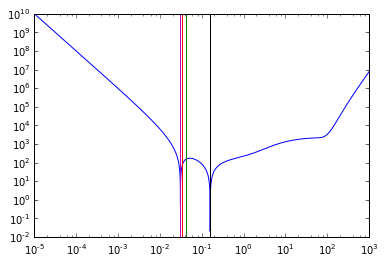

In [9]:
n=137
L=bh_orbit.angularmom(x[n],y[n],z[n],vx[n],vy[n],vz[n])[0]
E=bh_orbit.energy(x[n],y[n],z[n],vx[n],vy[n],vz[n])
r=10.**(np.linspace(-5,3.,10000))
plt.loglog(r,np.abs(bh_orbit._periapocenter_aux(r=r,E=E,L=L)))

r_guide_bh=bh_orbit.r_guide(x[n],y[n],z[n],vx[n],vy[n],vz[n])

plt.axvline(r_3d[n],color='r')
plt.axvline(bh_orbit.periapocenter(r_3d[n],x[n],y[n],z[n],vx[n],vy[n],vz[n])[0], color='m')
plt.axvline(bh_orbit.periapocenter(r_3d[n],x[n],y[n],z[n],vx[n],vy[n],vz[n])[1], color='black')
plt.axvline(r_guide_bh,color='g')


In [8]:
print(r_3d[n],r_guide_bh)

0.00774078 0.0022486681409039353


In [82]:
#with bh
binning=1000
r_mean=np.zeros((len(J_r)/binning))
Jr_mean=np.zeros(int(len(J_r)/binning))
Jtheta_mean=np.zeros(int(len(J_r)/binning))
Jphi_mean=np.zeros(int(len(J_r)/binning))
for i in range(int(len(J_r)/binning)):
    Jr_mean[i]=np.mean(J_r[i*binning:(i+1)*binning])
    Jtheta_mean[i]=np.mean(J_theta[i*binning:(i+1)*binning])
    Jphi_mean[i]=np.mean(J_phi[i*binning:(i+1)*binning])
    r_mean[i]=np.mean(r3d[i*binning:(i+1)*binning])
#print(r_mean,Jr_mean)

#without bh
r_mean_wo=np.zeros((len(J_r_wo)/binning))
Jr_mean_wo=np.zeros(int(len(J_r_wo)/binning))
Jtheta_mean_wo=np.zeros(int(len(J_theta_wo)/binning))
Jphi_mean_wo=np.zeros(int(len(J_phi_wo)/binning))
for i in range(int(len(J_r_wo)/binning)):
    Jr_mean_wo[i]=np.mean(J_r_wo[i*binning:(i+1)*binning])
    Jtheta_mean_wo[i]=np.mean(J_theta_wo[i*binning:(i+1)*binning])
    Jphi_mean_wo[i]=np.mean(J_phi_wo[i*binning:(i+1)*binning])
    r_mean_wo[i]=np.mean(r3d_wo[i*binning:(i+1)*binning])
#print(r_mean_wo,Jr_mean_wo)

r_bh=r_mean/hlr_bh
r_wo_bh=r_mean_wo/hlr_wo_bh

In [78]:
bh=GCphasespace(r=r3d,bin_num=30)
r_beta=bh.mean_distance(r3d)
beta=bh.anisotropy_param(vr,vtheta,vphi)

r_beta_bh=r_beta/hlr_bh

In [79]:
wo_bh=GCphasespace(r=r3d_wo,bin_num=30)
r_beta_wo=wo_bh.mean_distance(r3d_wo)
beta_wo=wo_bh.anisotropy_param(vr_wo,vtheta_wo,vphi_wo)

r_beta_wo_bh=r_beta_wo/hlr_wo_bh

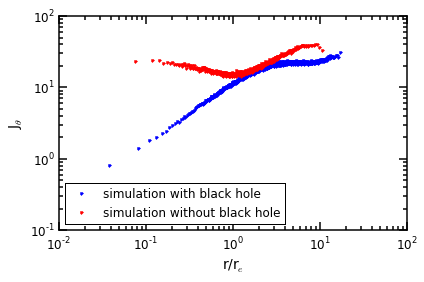

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh,Jtheta_mean,'b.',label='simulation with black hole')
ax.loglog(r_wo_bh,Jtheta_mean_wo,'r.',label='simulation without black hole')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r/r$_e$',fontsize=14)
ax.set_ylabel('J$_\\theta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

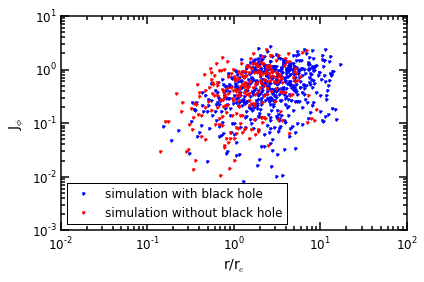

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh,Jphi_mean,'b.',label='simulation with black hole')
ax.loglog(r_wo_bh,Jphi_mean_wo,'r.',label='simulation without black hole')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r/r$_e$',fontsize=14)
ax.set_ylabel('J$_\phi$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

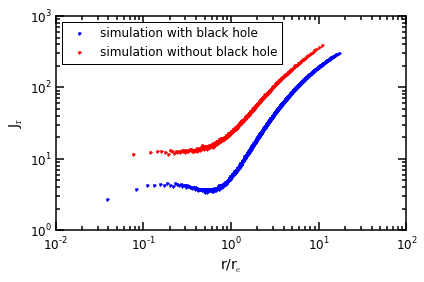

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_bh,Jr_mean,'b.',label='simulation with black hole')
ax.loglog(r_wo_bh,Jr_mean_wo,'r.',label='simulation without black hole')
ax.legend(loc=0,numpoints=1)
ax.set_xlabel('r/r$_e$',fontsize=14)
ax.set_ylabel('J$_\mathrm{r}$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

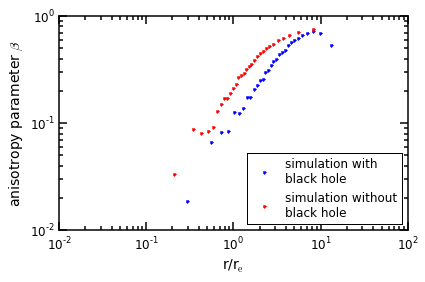

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(r_beta_bh,beta,'b.',label='simulation with\nblack hole')
ax.loglog(r_beta_wo_bh,beta_wo,'r.',label='simulation without\nblack hole')
ax.legend(loc=4,numpoints=1)
ax.set_xlim(0.01,100)
ax.set_xlabel('r/r$_\mathrm{e}$',fontsize=14)
ax.set_ylabel('anisotropy parameter $\\beta$',fontsize=14)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [ ]:
#v_circ(r)=sqrt(r*del Phi/del r)